# Librerias utilizadas

In [9]:
%pip install wget

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import wget
import scipy.io.wavfile as wave
import IPython
from scipy.linalg import toeplitz, inv

# 1. Reproducir diferentes excitaciones u<sub>k</sub>(n) con un parlante y medir su respuesta y<sub>k</sub>(n) con un micrófono, con N = 48000 y fs = 48 kHz.

## a. Señal de música

In [11]:
song_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP2/Grabaciones/Entradas/buttercup_1seg.wav?raw=true'
song_file = wget.download(song_url)

In [12]:
fs, song_array = wave.read(str(song_file))
print("fs = "+str(fs))
print("Number of samples = "+ str(len(song_array)))
IPython.display.Audio(song_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [13]:
song_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/Buttercup.wav'
song_out_file = wget.download(song_out_url)
fs, song_out_array = wave.read(str(song_out_file))
IPython.display.Audio(song_out_array,rate=fs)

## b. Una señal de voz

In [14]:
voice_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Entradas/Okay_1seg.wav'
voice_file = wget.download(voice_url)

In [15]:
fs, voice_array = wave.read(voice_file)
print("fs = "+str(fs))
print("Number of samples = "+ str(len(voice_array)))
IPython.display.Audio(voice_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [16]:
voice_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/okay.wav'
voice_out_file = wget.download(voice_out_url)
fs, voice_out_array = wave.read(str(voice_out_file))
IPython.display.Audio(voice_out_array,rate=fs)

## c. Una señal cuadrada de f<sub>0</sub>=100 Hz

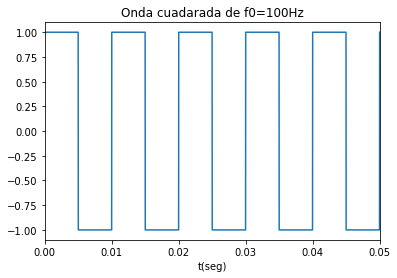

In [17]:
t= np.linspace(start=0,stop=1,num=48000)
f = 100         #Frecuencia fundamental de la onda cuadrada
square_wave = sig.square(2 * np.pi * f * t)
plt.plot(t, square_wave)
plt.title("Onda cuadarada de f0=100Hz")
plt.xlim(left=0,right=0.05)
plt.xlabel("t(seg)")
plt.show()

In [18]:
IPython.display.Audio(square_wave,rate=fs)

Respuesta medida:

In [19]:
square_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/square.wav'
square_out_file = wget.download(square_out_url)
fs, square_out_array = wave.read(str(square_out_file))
IPython.display.Audio(square_out_array,rate=fs)

## d. Un barrido lineal de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [20]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1
K= (f1-f0)/T
x = 2 * np.pi * t * ( f0 + 0.5 * K * t)
lineal_sweep = np.sin(x)

In [21]:
IPython.display.Audio(lineal_sweep,rate=fs)

Respuesta medida:

In [22]:
lineal_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/lineal.wav'
lineal_out_file = wget.download(lineal_out_url)
fs, lineal_out_array = wave.read(str(lineal_out_file))
IPython.display.Audio(lineal_out_array,rate=fs)

## e. Un barrido exponencial de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [23]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1.
K= (f1/f0)**(1./T)
x = 2 * np.pi * f0 * ( ( (K**t)-1 )/math.log(K) )
exp_sweep = np.sin(x)

In [24]:
IPython.display.Audio(exp_sweep,rate=fs)

Respuesta medida:

In [25]:
exp_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/exp.wav'
exp_out_file = wget.download(exp_out_url)
fs, exp_out_array = wave.read(str(exp_out_file))
IPython.display.Audio(exp_out_array,rate=fs)

## f. Ruido blanco guassiano de media cero

In [26]:
noise = np.random.randn(48000)
IPython.display.Audio(noise,rate=fs)

Respuesta medida:

In [27]:
noise_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/noise.wav'
noise_out_file = wget.download(noise_out_url)
fs, noise_out_array = wave.read(str(noise_out_file))
IPython.display.Audio(noise_out_array,rate=fs)

# 2. Estimar el filtro óptimo en cada uno de los casos. Graficar J<sub>min</sub> en función de M, y determinar el valor óptimo de M para cuando no se observe mejora de J<sub>min</sub> con aumento de M. Para ese valor de M, determinar ε y los autovalores de la matriz de autocorrelación. Ordenar los autovalores de mayor a menor, y graficar su distribución.

In [28]:
def r_matrix(vect, M):
    corr = np.correlate(vect,np.conj(vect), mode='full')
    corr_trunc = corr[corr.argmax():corr.argmax()+M] / len(corr)
    r = toeplitz(corr_trunc)
    return r

def get_eigenvalues(u_n, M):
    r = r_matrix(u_n, M)
    ev = np.linalg.eig(r)
    return ev

def wiener_coefs(u_n, d_n, M):
    r = r_matrix(u_n, M)
    r_inv = inv(r)
    p = np.correlate(u_n, np.conj(d_n), mode='full')
    start = len(p)//2
    p_m = np.flip(p[start-M:start] / len(p))

    w_o = np.dot(r_inv, p_m)
    var_d = np.var(d_n)
    var_d_hat = np.matmul(np.conj(p_m),w_o )
    var_d_hat = p_m.dot(w_o)
    Jmin = var_d - var_d_hat
    epsilon = 1 - var_d_hat/(var_d+1e-19)
    return w_o, Jmin, epsilon

def search_opt_M(data, desired,M_list):
    Jmin_s = []
    eps_s = []
    for m in M_list:
        print('Starting order ', m)
        w_o, Jmin, epsilon = wiener_coefs(data, desired, m)
        filtered = filterW(data, w_o)
        Jmin_s.append(Jmin)
        eps_s.append(epsilon)
    return filtered, Jmin_s, eps_s
    
        
def filterW(data, w_o):
    samples = len(data)
    M = len(w_o)
    filtered = np.zeros(samples)
    filtered = sig.filtfilt(w_o, [1], data)
    return filtered

def calc_error(filtered, desired):
    var_d = np.var(d_n)
    var_d_hat = np.matmul(np.matmul(p, r_inv), p.reshape((-1, 1)))
    Jmin = var_d - var_d_hat
    eps = 1 - var_d_hat/var_d
    return Jmin, eps

def plot_u_and_d(u,d):
    plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Ampitude')
    plt.xlabel('Samples')
    plt.title('u(n) vs d(n)')
    plt.grid('on')
    plt.plot(u, label='u(n)')
    plt.plot(d, label='d(n)')
    plt.legend(loc='upper center')
    plt.show()

def plot_Jmin_and_eps(M_s, Jmin_s, eps_s):
    plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(121)
    plt.ylabel('Jmin')
    plt.xlabel('M')
    plt.title('Jmin vs M')
    plt.grid('on')
    plt.plot(M_s, Jmin_s, marker='o', linestyle='--', color='r', label='Square')
    plt.subplot(122)
    plt.ylabel('epsilon')
    plt.xlabel('M')
    plt.title('epsilon vs M')
    plt.grid('on')
    plt.plot(M_s, eps_s, marker='o', linestyle='--', color='r', label='Square')
    plt.show()

def plot_ev(ev):
    plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k')
    plt.hist(ev, bins=20)
    plt.title('Eigenvalues Distribution')
    plt.ylabel('Multiplicity')
    plt.xlabel('Eigenvalue')
    plt.grid('on')
    plt.show()

## Voice Signal

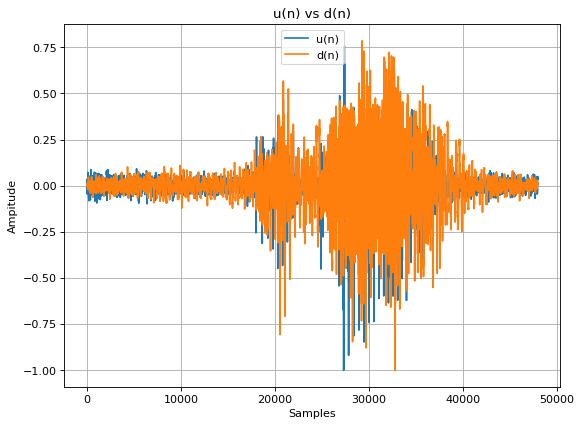

Starting order  2
Starting order  2
Starting order  4
Starting order  6
Starting order  9
Starting order  14
Starting order  22
Starting order  33
Starting order  49
Starting order  74
Starting order  110
Starting order  165
Starting order  246
Starting order  368
Starting order  550
Starting order  822
Starting order  1228
Starting order  1835
Starting order  2742
Starting order  4096


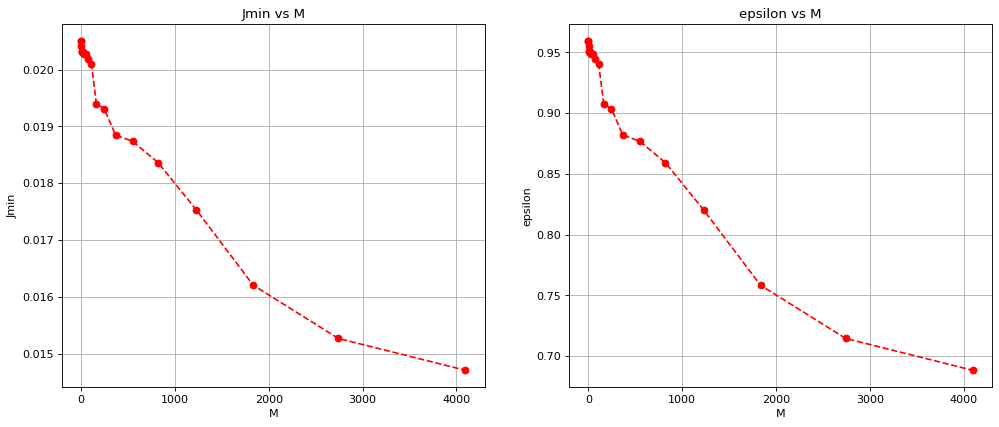

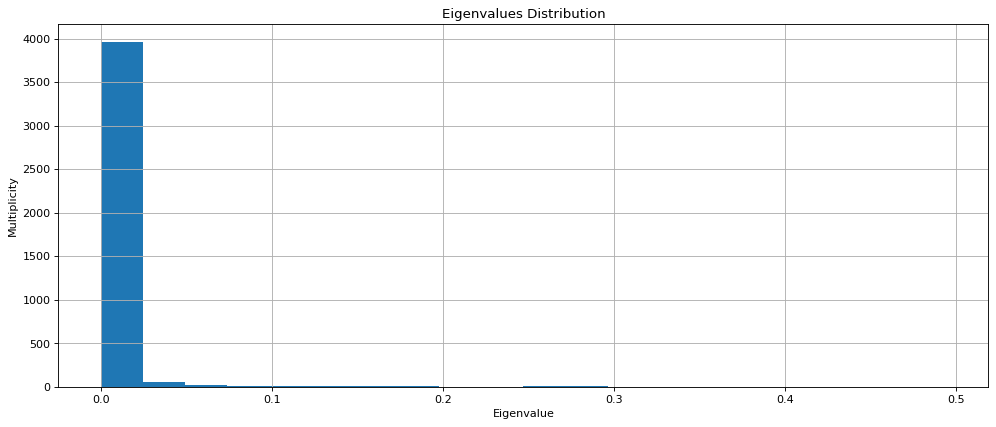

In [30]:
M_values = np.logspace(start =1, stop=12, num=20, base=2, dtype=int)

data = voice_array
desired = voice_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s= search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [31]:
IPython.display.Audio(filtered,rate=fs)

## Song Signal

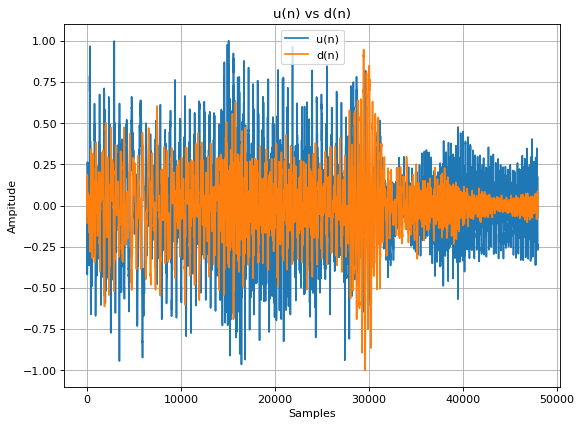

Starting order  2
Starting order  2
Starting order  4
Starting order  6
Starting order  9
Starting order  14
Starting order  22
Starting order  33
Starting order  49
Starting order  74
Starting order  110
Starting order  165
Starting order  246
Starting order  368
Starting order  550
Starting order  822
Starting order  1228
Starting order  1835
Starting order  2742
Starting order  4096


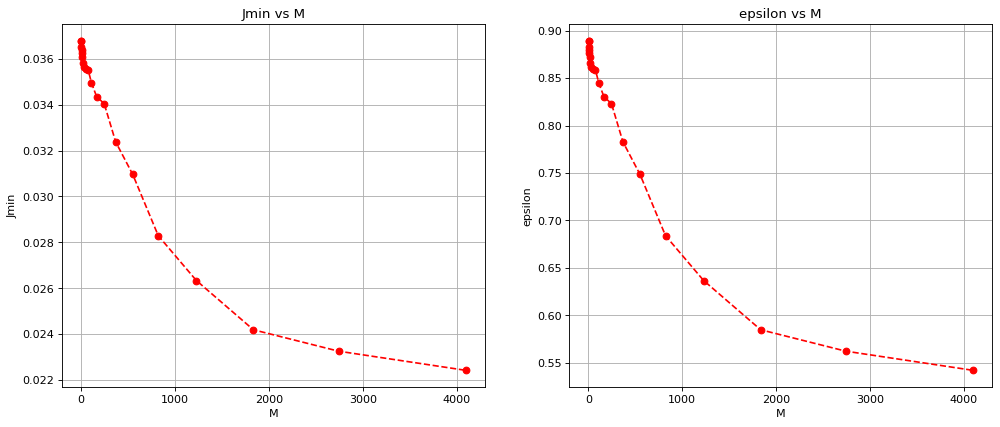

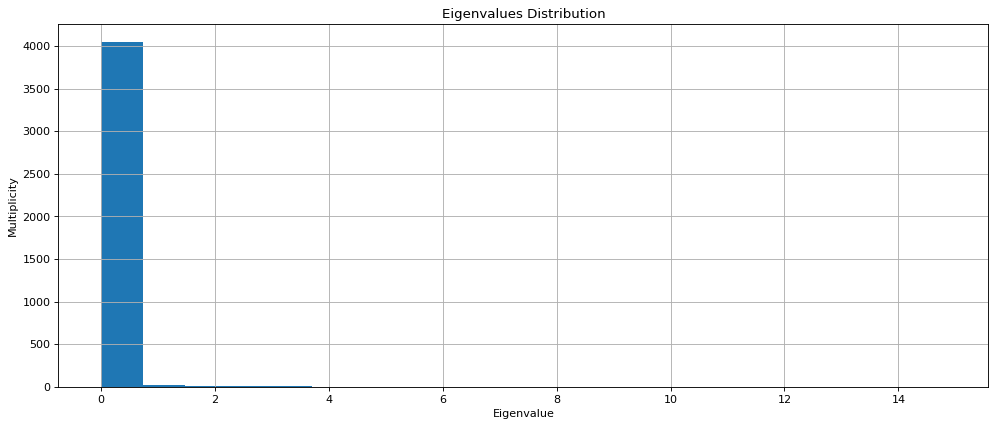

In [32]:
M_values = np.logspace(start =1, stop=12, num=20, base=2, dtype=int)

data = song_array
desired = song_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s= search_opt_M(u_n, d_n,M_values )
plot_Jmin_and_eps(M_values , Jmin_s, eps_s)
m_opt = M_values [-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [33]:
IPython.display.Audio(filtered,rate=fs)

## Square Signal

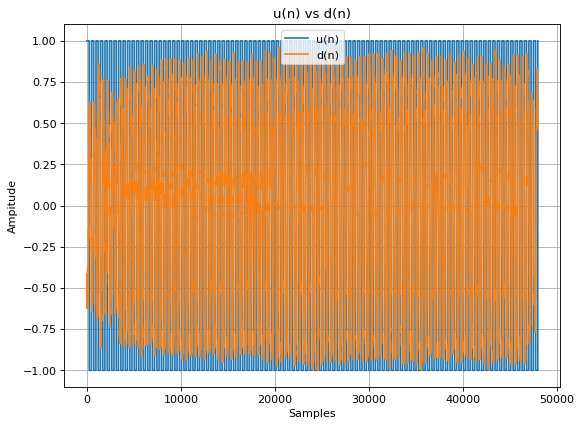

Starting order  2
Starting order  2
Starting order  4
Starting order  6
Starting order  9
Starting order  14
Starting order  22
Starting order  33
Starting order  49
Starting order  74
Starting order  110
Starting order  165
Starting order  246
Starting order  368
Starting order  550
Starting order  822
Starting order  1228
Starting order  1835
Starting order  2742
Starting order  4096


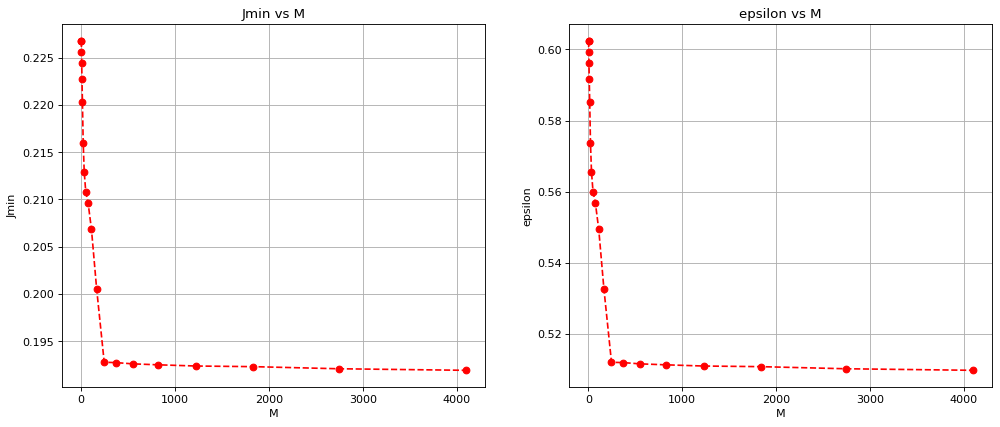

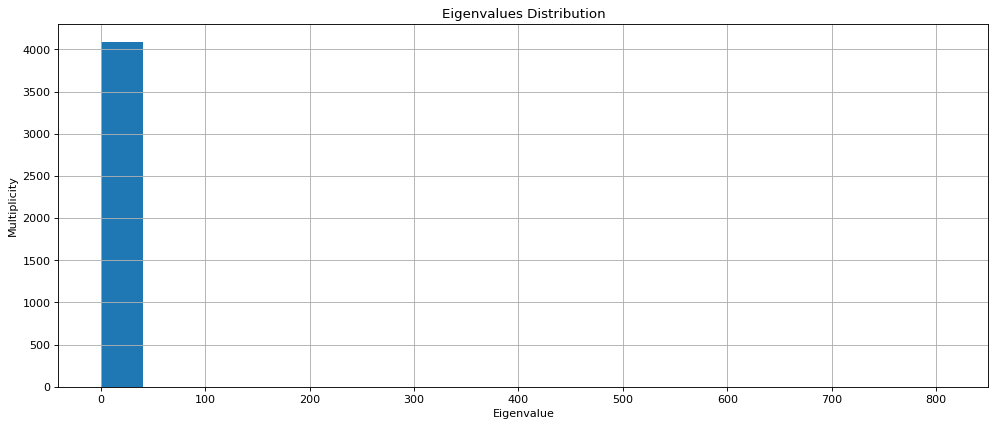

In [34]:
M_values = np.logspace(start =1, stop=12, num=20, base=2, dtype=int)

data = square_wave
desired = square_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s = search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [35]:
IPython.display.Audio(filtered,rate=fs)

## Lineal Signal

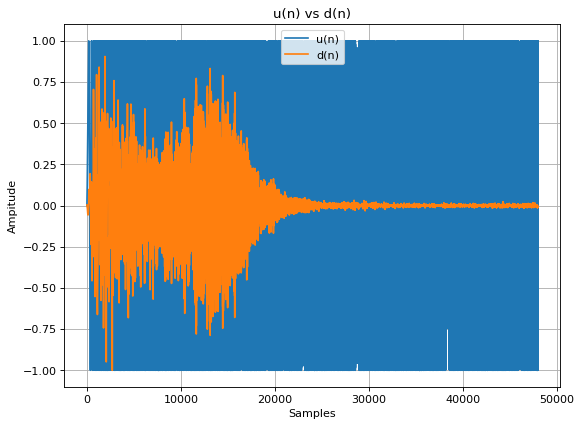

Starting order  2
Starting order  2
Starting order  4
Starting order  6
Starting order  9
Starting order  14
Starting order  22
Starting order  33
Starting order  49
Starting order  74
Starting order  110
Starting order  165
Starting order  246
Starting order  368
Starting order  550
Starting order  822
Starting order  1228
Starting order  1835
Starting order  2742
Starting order  4096


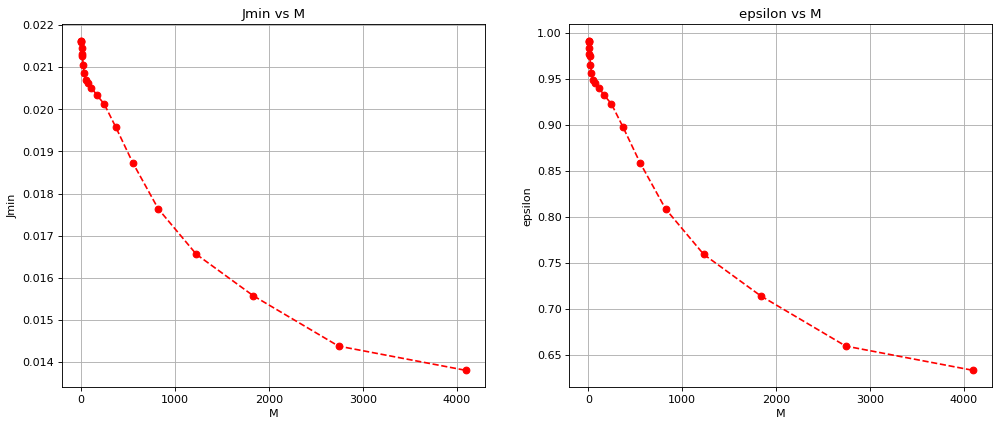

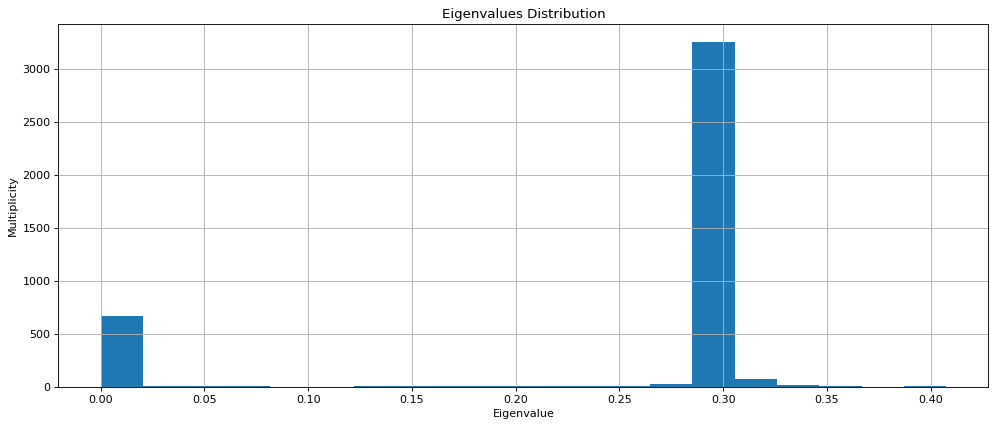

In [36]:
M_values = np.logspace(start =1, stop=12, num=20, base=2, dtype=int)

data = lineal_sweep
desired = lineal_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s= search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [37]:
IPython.display.Audio(filtered,rate=fs)

## Exp Signal

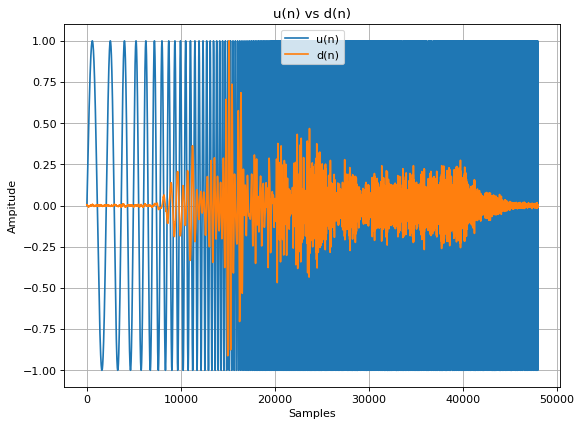

Starting order  2
Starting order  2
Starting order  4
Starting order  6
Starting order  9
Starting order  14
Starting order  22
Starting order  33
Starting order  49
Starting order  74
Starting order  110
Starting order  165
Starting order  246
Starting order  368
Starting order  550
Starting order  822
Starting order  1228
Starting order  1835
Starting order  2742
Starting order  4096


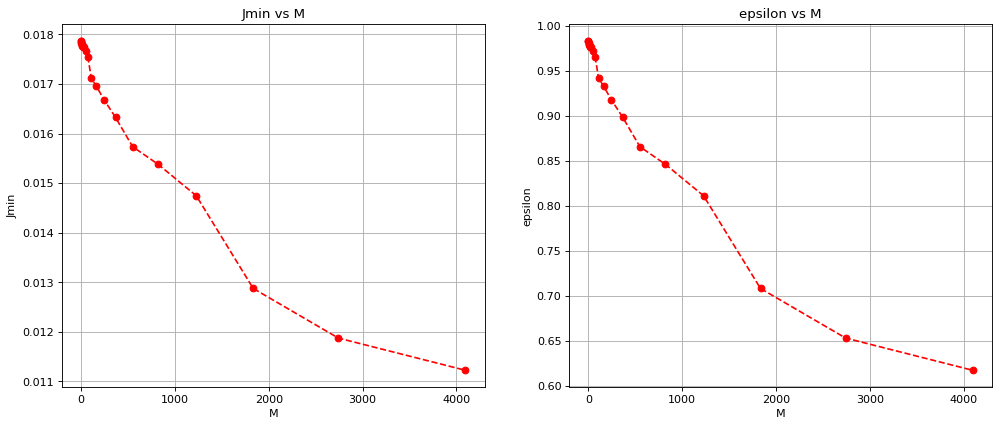

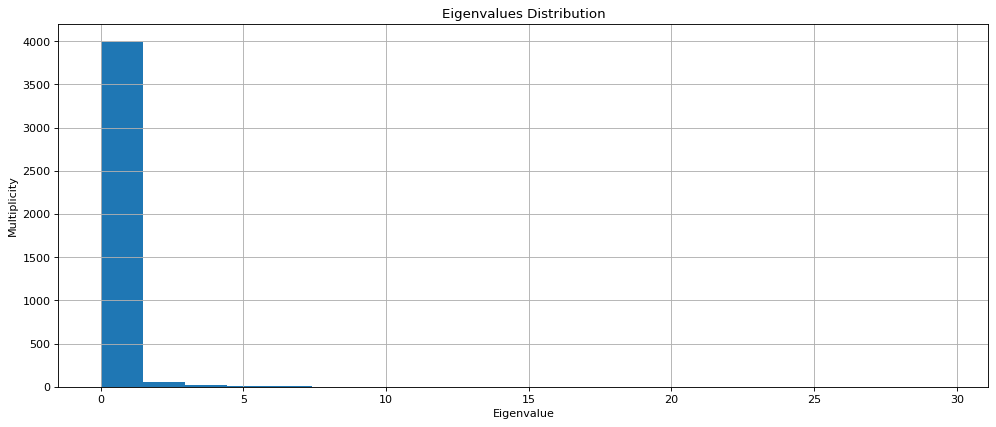

In [38]:
M_values = np.logspace(start =1, stop=12, num=20, base=2, dtype=int)

data = exp_sweep
desired = exp_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s = search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [39]:
IPython.display.Audio(filtered,rate=fs)

## Noise Signal

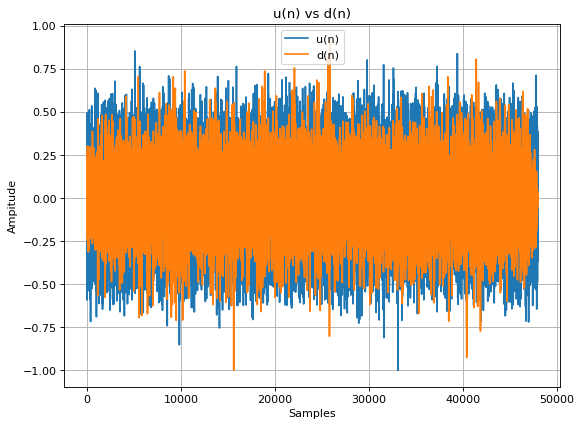

Starting order  2
Starting order  2
Starting order  4
Starting order  6
Starting order  9
Starting order  14
Starting order  22
Starting order  33
Starting order  49
Starting order  74
Starting order  110
Starting order  165
Starting order  246
Starting order  368
Starting order  550
Starting order  822
Starting order  1228
Starting order  1835
Starting order  2742
Starting order  4096


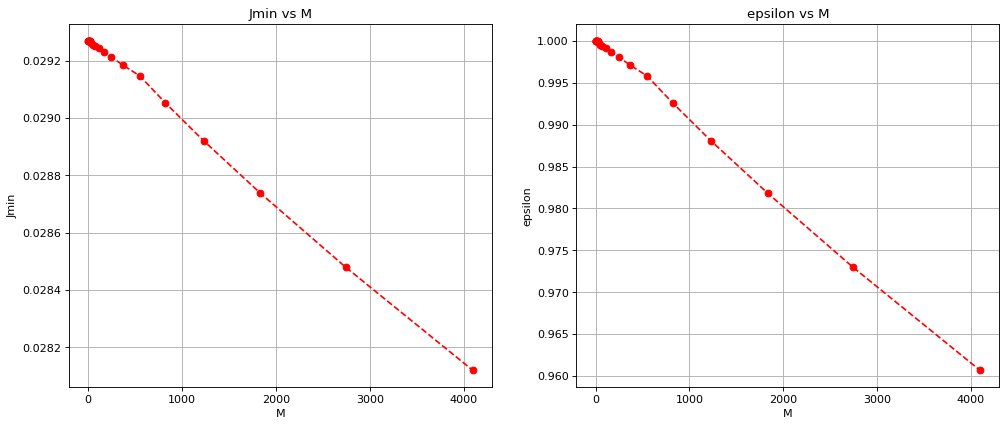

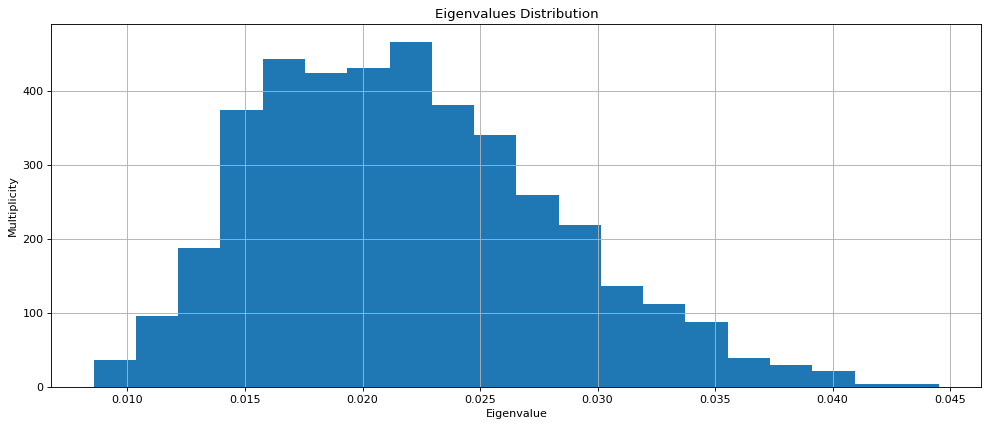

In [40]:
M_values = np.logspace(start =1, stop=12, num=20, base=2, dtype=int)

data = noise
desired = noise_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s = search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [41]:
IPython.display.Audio(filtered,rate=fs)

# 3 Realizar un contraste cualitativo y cuantitativo entre los filtros óptimos de los diferentes casos.

Comparando las graficas anteriores se pueden notar los siguientes valores de $\epsilon$ logrados,ordenados de menor al mayor:

1.   Onda cuadrada: $\epsilon=0.511$ $,M=246$
2.   Cancion: $\epsilon=0.55$ $,M=3500$
3.   Barrido lineal: $\epsilon=0.63$ $,M=4096$
4.   Barrido exponencial: $\epsilon=0.63$ $,M=4096$
5.   Voz humana: $\epsilon=0.68$ $,M=4096$
6.   Ruido blanco: $\epsilon=0.96$ $,M=4096$

Como menor valor de $\epsilon$ se corresponde con una mejor estimacion, se tiene que la lista tambien esta ordenada de la mejor estimacion(onda cuadrada) hacia la peor(ruido blanco). Asimsimo se puede notar que la estimacion para la señal cuadrada fue la mas rapida en estancarse en un valor de J<sub>min</sub>, ya que a partir de M=246 se puede apreciar que no hay mejoras apreciables en el valor de $\epsilon$.

Al escuchar las señales de audio filitrada correspondiente al ruido blanco asi como tambien la de voz , se puede notar que efectivamente difiere notablemente de como suena la medicion realizada. Por otro lado, la version filtrada que se obtuvo para la cancion y para la onda cuadrada son muy similares a las mediciones realizadas.
A nivel personal el audio de la cancion pareceria ser el que mejor replica la repuesta del cuarto.Por esto y por tener un valor de $\epsilon$ muy cercano al minimo logrado, se utilizaran los coeficientes calculados en dicha estimacion para modelar la respuesta de la habitacion







# 4 A partir del contraste del punto anterior, seleccionar el filtro que mejor representa la respuesta de la habitación. Filtrar un segmento de audio con este segmento. Escucharlo con auriculares y compararlo con la señal escuchada en la habitación.

Teniendo en cuenta lo mencionado previamente se toma como filtro mas representativo el que se obtuvo de la señal de musica

In [65]:
test_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP2/Grabaciones/Entradas/Angel_Thesis.wav?raw=true'
test_file = wget.download(test_url)
fs, test_array = wave.read(str(test_file))
print("fs = "+str(fs))
print("Number of samples = "+ str(len(test_array)))

fs = 48000
Number of samples = 1779949


Se utiliza el siguiente segmento de audio como señal a filtrar

In [66]:
start = 20*fs
end = start+5*fs
test_fragment = test_array[start:end]
test_fragment = test_fragment.sum(axis=1)/2.
IPython.display.Audio(test_fragment,rate=fs)

Filtramos la señal utilizando la mejor estimacion del filtro

In [67]:
data = song_array
desired = song_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
m=3500
w_o, Jmin, epsilon = wiener_coefs(u_n, d_n, m)
test_norm = (test_fragment-test_fragment.mean())/test_fragment.max()
filtered_test = filterW(test_norm,w_o)

Comparamos el reslutado del filtro con la señal grabada en la habitacion.

240000
Grabacion en el cuarto:
Resultado del Filtro:


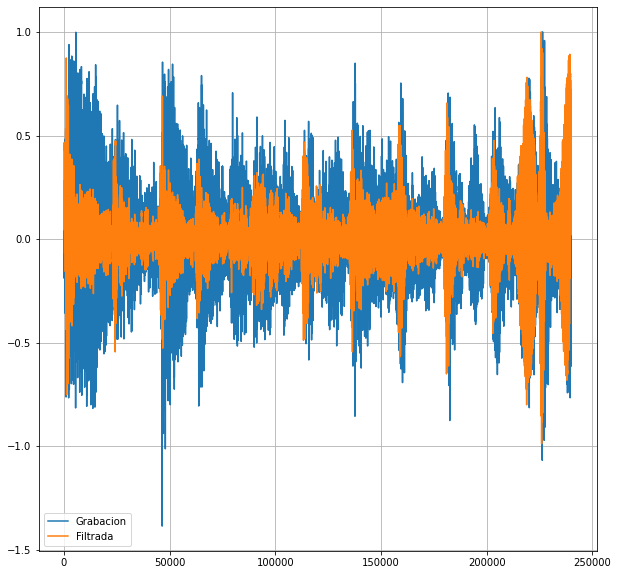

In [82]:
test_medida_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/test_medida.wav'
test_medida_file = wget.download(test_medida_url)
fs, medicion_array = wave.read(str(test_medida_file))
print(len(medicion_array))
print("Grabacion en el cuarto:")
IPython.display.Audio(medicion_array,rate=fs)
print("Resultado del Filtro:")
IPython.display.Audio(filtered_test,rate=fs)

plt.figure(figsize=(10,10))
plt.plot(medicion_array/medicion_array.max(), label= "Grabacion")
plt.plot(filtered_test/filtered_test.max(), label="Filtrada")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
print("Grabacion en el cuarto:")
IPython.display.Audio(medicion_array,rate=fs)

Grabacion en el cuarto:


In [77]:
print("Resultado del Filtro:")
IPython.display.Audio(filtered_test,rate=fs)

Resultado del Filtro:


Comparando el audio de ambas señales, se puede notar que la filtrada se escucha como si la fuente del audio estuviese mas lejos que en la grabacion actual. El audio de la filtrada suena mas bajo, esto tambien se puede apreciar en la grafica en el tiempo de ambas señales donde se ve que la señal grabada tiene una menor atenuacion que la fltrada.